In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('used_cars.csv')  # Make sure the CSV file is in the same directory
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [3]:
df.info()

print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB
brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [4]:
df.nunique()


brand             57
model           1898
model_year        34
milage          2818
fuel_type          7
engine          1146
transmission      62
ext_col          319
int_col          156
accident           2
clean_title        1
price           1569
dtype: int64

In [5]:
df.drop(columns=['model', 'ext_col', 'int_col'], inplace=True)

In [6]:
df.head()

,brand,model_year,milage,fuel_type,engine,transmission,accident,clean_title,price
0,Ford,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,None reported,NaN,"$54,598"
3,INFINITI,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,None reported,Yes,"$15,500"
4,Audi,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,None reported,NaN,"$34,999"


In [7]:
def extract_gear_and_type(trans):
    gear = None
    is_automatic = 0

    if isinstance(trans, str):
        for ch in trans:
            if ch.isdigit():
                gear = int(ch)
                break

        trans_lower = trans.lower()
        if 'auto' in trans_lower or 'a/t' in trans_lower:
            is_automatic = 1
        elif 'manual' in trans_lower or 'm/t' in trans_lower:
            is_automatic = 0  # manual

    return gear, is_automatic

df[['gear', 'is_automatic']] = df['transmission'].apply(lambda x: pd.Series(extract_gear_and_type(x)))

df.head(20)


,brand,model_year,milage,fuel_type,engine,transmission,accident,clean_title,price,gear,is_automatic
0,Ford,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,At least 1 accident or damage reported,Yes,"$10,300",6.0,1.0
1,Hyundai,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,At least 1 accident or damage reported,Yes,"$38,005",8.0,1.0
2,Lexus,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,None reported,NaN,"$54,598",NaN,1.0
3,INFINITI,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,None reported,Yes,"$15,500",7.0,1.0
4,Audi,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,None reported,NaN,"$34,999",8.0,1.0
5,Acura,2016,"136,397 mi.",Gasoline,2.4 Liter,F,None reported,NaN,"$14,798",NaN,0.0
6,Audi,2017,"84,000 mi.",Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,None reported,Yes,"$31,000",6.0,1.0
7,BMW,2001,"242,000 mi.",Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,None reported,Yes,"$7,300",NaN,1.0
8,Lexus,2021,"23,436 mi.",Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,None reported,Yes,"$41,927",6.0,1.0
9,Tesla,2020,"34,000 mi.",NaN,534.0HP Electric Motor Electric Fuel System,A/T,None reported,Yes,"$69,950",NaN,1.0


In [8]:
df.drop(columns=['transmission', 'clean_title'], inplace=True)

In [9]:
df.head()

,brand,model_year,milage,fuel_type,engine,accident,price,gear,is_automatic
0,Ford,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,At least 1 accident or damage reported,"$10,300",6.0,1.0
1,Hyundai,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,At least 1 accident or damage reported,"$38,005",8.0,1.0
2,Lexus,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,None reported,"$54,598",NaN,1.0
3,INFINITI,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,None reported,"$15,500",7.0,1.0
4,Audi,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,None reported,"$34,999",8.0,1.0


In [10]:
import re

def extract_engine_features(engine):
    hp = None
    litre = None
    cylinder = None

    if isinstance(engine, str):
        # Extract number before "HP"
        hp_match = re.search(r'(\d+(\.\d+)?)\s*HP', engine, re.IGNORECASE)
        if hp_match:
            hp = float(hp_match.group(1))

        # Extract number before "L"
        litre_match = re.search(r'(\d+(\.\d+)?)L', engine, re.IGNORECASE)
        if litre_match:
            litre = float(litre_match.group(1))

        # Extract number after "V"
        cylinder_match = re.search(r'V(\d+)', engine, re.IGNORECASE)
        if cylinder_match:
            cylinder = int(cylinder_match.group(1))

    return hp, litre, cylinder

# Apply function and create new columns
df[['hp', 'litre', 'cylinder']] = df['engine'].apply(lambda x: pd.Series(extract_engine_features(x)))

# Preview the result
df[['engine', 'hp', 'litre', 'cylinder']].head()


,engine,hp,litre,cylinder
0,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,300.0,3.7,6.0
1,3.8L V6 24V GDI DOHC,NaN,3.8,6.0
2,3.5 Liter DOHC,NaN,NaN,NaN
3,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,354.0,3.5,6.0
4,2.0L I4 16V GDI DOHC Turbo,NaN,2.0,NaN


In [11]:
def has_accident(accident_str):
    if isinstance(accident_str, str):
        return int(bool(re.search(r'\d+', accident_str)))
    return 0

# Apply the correct function
df['has_accident'] = df['accident'].apply(has_accident)


In [12]:
df.drop(columns=['engine', 'accident', ], inplace=True)

In [13]:
df.head()

,brand,model_year,milage,fuel_type,price,gear,is_automatic,hp,litre,cylinder,has_accident
0,Ford,2013,"51,000 mi.",E85 Flex Fuel,"$10,300",6.0,1.0,300.0,3.7,6.0,1
1,Hyundai,2021,"34,742 mi.",Gasoline,"$38,005",8.0,1.0,NaN,3.8,6.0,1
2,Lexus,2022,"22,372 mi.",Gasoline,"$54,598",NaN,1.0,NaN,NaN,NaN,0
3,INFINITI,2015,"88,900 mi.",Hybrid,"$15,500",7.0,1.0,354.0,3.5,6.0,0
4,Audi,2021,"9,835 mi.",Gasoline,"$34,999",8.0,1.0,NaN,2.0,NaN,0


In [14]:
df['milage'] = df['milage'].str.replace(',', '').str.extract(r'(\d+)')
df['milage'] = pd.to_numeric(df['milage'], errors='coerce').astype('Int64')

df['price'] = df['price'].str.replace(',', '').str.replace('₹', '').str.replace('$', '')
df['price'] = pd.to_numeric(df['price'], errors='coerce').astype('Int64')


In [15]:
df.head()

,brand,model_year,milage,fuel_type,price,gear,is_automatic,hp,litre,cylinder,has_accident
0,Ford,2013,51000,E85 Flex Fuel,10300,6.0,1.0,300.0,3.7,6.0,1
1,Hyundai,2021,34742,Gasoline,38005,8.0,1.0,NaN,3.8,6.0,1
2,Lexus,2022,22372,Gasoline,54598,NaN,1.0,NaN,NaN,NaN,0
3,INFINITI,2015,88900,Hybrid,15500,7.0,1.0,354.0,3.5,6.0,0
4,Audi,2021,9835,Gasoline,34999,8.0,1.0,NaN,2.0,NaN,0


In [16]:
df.dtypes

brand            object
model_year        int64
milage            Int64
fuel_type        object
price             Int64
gear            float64
is_automatic    float64
hp              float64
litre           float64
cylinder        float64
has_accident      int64
dtype: object

In [17]:
print(df.isnull().sum())


brand              0
model_year         0
milage             0
fuel_type        170
price              0
gear            1833
is_automatic       0
hp               808
litre            377
cylinder        2799
has_accident       0
dtype: int64


In [18]:
def fill_missing_values(df):
    # 1. Fill missing numeric values with mean
    numeric_cols = ['gear', 'hp', 'litre', 'cylinder']
    for col in numeric_cols:
        mean_val = df[col].mean()
        df[col] = df[col].fillna(mean_val)

    # 2. Fill missing categorical 'fuel_type' with most frequent value
    if 'fuel_type' in df.columns:
        most_common = df['fuel_type'].mode()[0]
        df['fuel_type'] = df['fuel_type'].fillna(most_common)
    
    return df

df = fill_missing_values(df)


In [19]:
df.isna().sum()

brand           0
model_year      0
milage          0
fuel_type       0
price           0
gear            0
is_automatic    0
hp              0
litre           0
cylinder        0
has_accident    0
dtype: int64

In [20]:
df.dtypes

brand            object
model_year        int64
milage            Int64
fuel_type        object
price             Int64
gear            float64
is_automatic    float64
hp              float64
litre           float64
cylinder        float64
has_accident      int64
dtype: object

In [21]:
from sklearn.preprocessing import LabelEncoder

le_brand = LabelEncoder()
df['brand_encoded'] = le_brand.fit_transform(df['brand'])

df = pd.get_dummies(df, columns=['fuel_type'], drop_first=True)

X = df.drop(columns=['price', 'brand'])  # drop original brand and target
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
df.head()

,brand,model_year,milage,price,gear,is_automatic,hp,litre,cylinder,has_accident,brand_encoded,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_not supported,fuel_type_–
0,Ford,2013,51000,10300,6.000000,1.0,300.000000,3.700000,6.000000,1,14,True,False,False,False,False,False
1,Hyundai,2021,34742,38005,8.000000,1.0,332.206498,3.800000,6.000000,1,19,False,True,False,False,False,False
2,Lexus,2022,22372,54598,6.102022,1.0,332.206498,3.709045,6.290909,0,27,False,True,False,False,False,False
3,INFINITI,2015,88900,15500,7.000000,1.0,354.000000,3.500000,6.000000,0,20,False,False,True,False,False,False
4,Audi,2021,9835,34999,8.000000,1.0,332.206498,2.000000,6.290909,0,3,False,True,False,False,False,False


In [23]:
X = df.drop(columns=['price', 'brand'])  # Drop 'price' (target) and 'brand' (replaced with 'brand_encoded')
y = df['price']


In [24]:
y_log = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)


In [25]:
print(X.isnull().sum())
print(y.isnull().sum())


model_year                  0
milage                      0
gear                        0
is_automatic                0
hp                          0
litre                       0
cylinder                    0
has_accident                0
brand_encoded               0
fuel_type_E85 Flex Fuel     0
fuel_type_Gasoline          0
fuel_type_Hybrid            0
fuel_type_Plug-In Hybrid    0
fuel_type_not supported     0
fuel_type_–                 0
dtype: int64
0


In [26]:
print(X.dtypes)


model_year                    int64
milage                        Int64
gear                        float64
is_automatic                float64
hp                          float64
litre                       float64
cylinder                    float64
has_accident                  int64
brand_encoded                 int64
fuel_type_E85 Flex Fuel        bool
fuel_type_Gasoline             bool
fuel_type_Hybrid               bool
fuel_type_Plug-In Hybrid       bool
fuel_type_not supported        bool
fuel_type_–                    bool
dtype: object


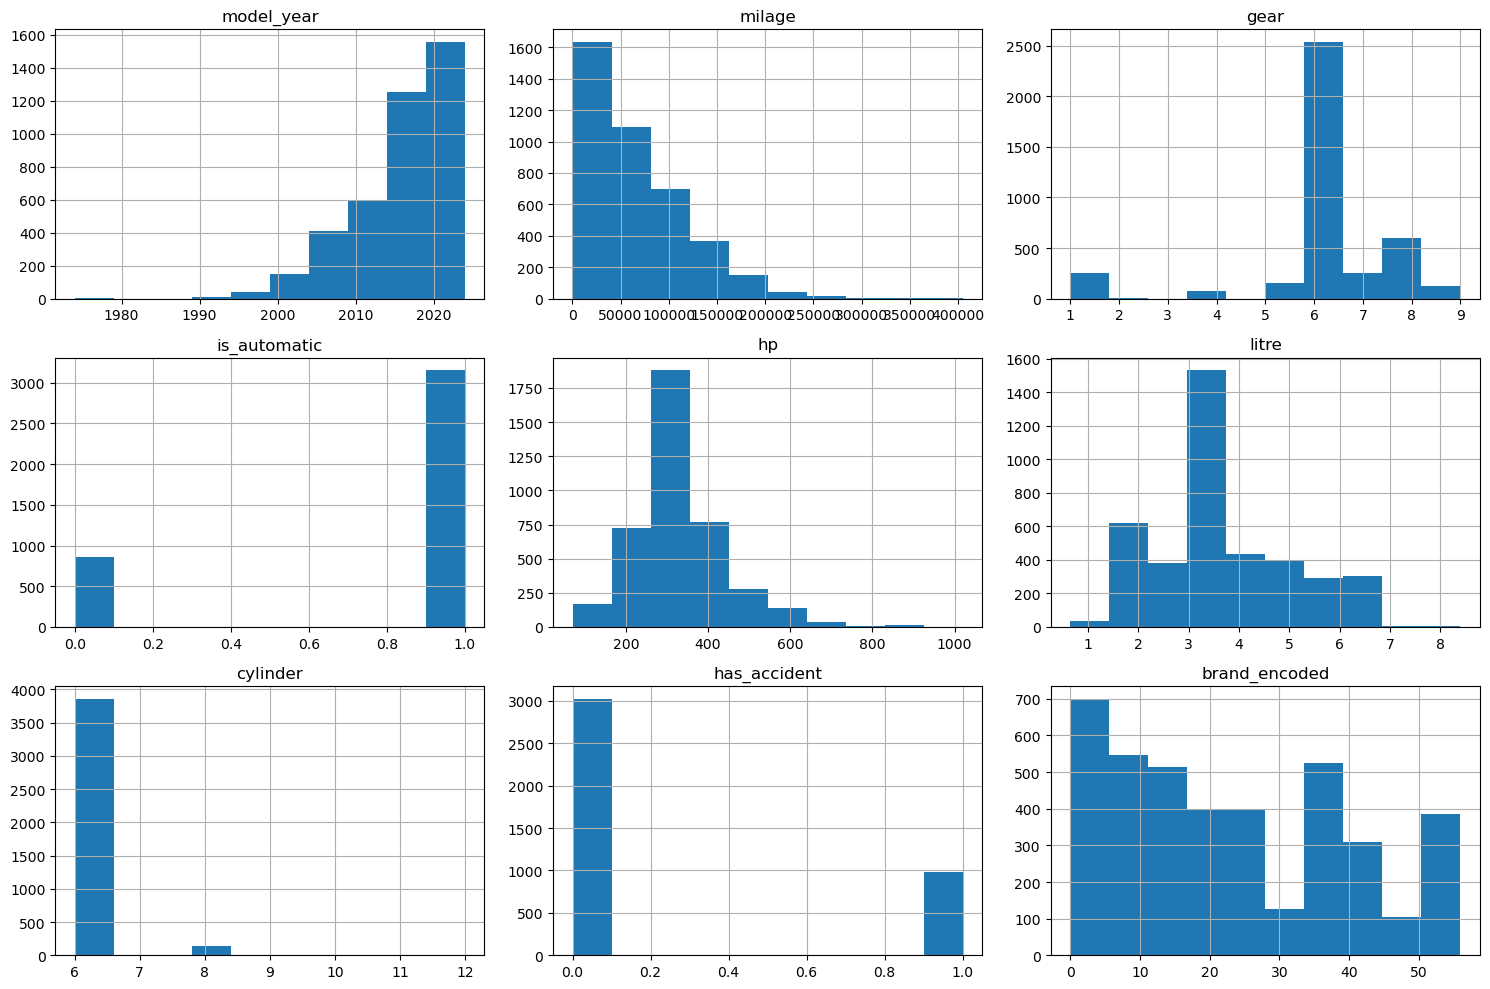

In [27]:
import matplotlib.pyplot as plt

X.hist(figsize=(15,10))
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


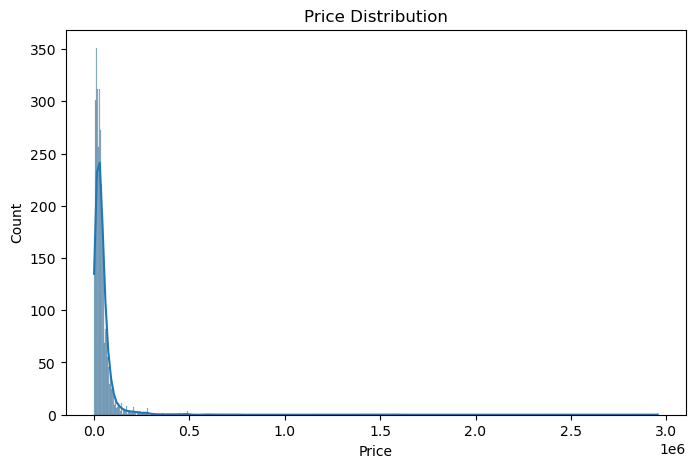

In [28]:
y = y.astype(float)

plt.figure(figsize=(8, 5))
sns.histplot(y, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.show()


In [29]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict (in log scale)
y_pred_log = model.predict(X_test)

# Convert predictions back to original price scale
y_pred = np.expm1(y_pred_log)  # inverse of log1p
y_true = np.expm1(y_test)      # inverse for ground truth


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mpe = np.mean((y_true - y_pred) / y_true) * 100
    
    print("📊 Model Evaluation: Random Forest (with log target)")
    print(f"MAE   (Absolute):         {mae:,.2f} ({(mae / y_true.mean()) * 100:.2f}%)")
    print(f"RMSE  (Absolute):         {rmse:,.2f} ({(rmse / y_true.mean()) * 100:.2f}%)")
    print(f"R²    (R-squared):        {r2:.4f}")
    print(f"MAPE  (Mean Abs % Error): {mape:.2f}%")
    print(f"MPE   (Mean % Error):     {mpe:.2f}%")
    
evaluate_model(y_true, y_pred)


📊 Model Evaluation: Random Forest (with log target)
MAE   (Absolute):         17,670.15 (35.16%)
RMSE  (Absolute):         135,287.21 (269.17%)
R²    (R-squared):        0.1045
MAPE  (Mean Abs % Error): 23.67%
MPE   (Mean % Error):     -4.42%


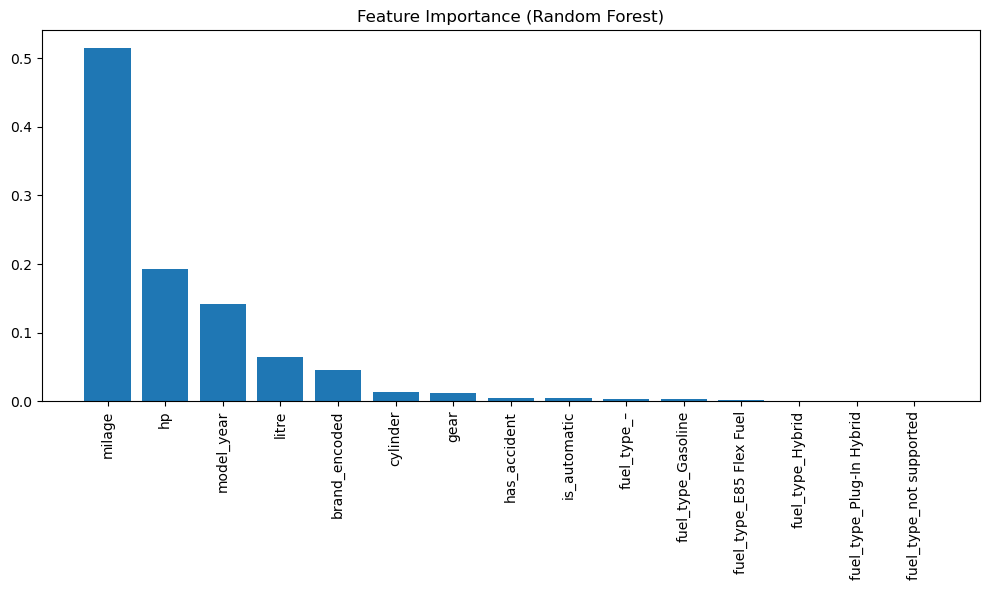

In [31]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(len(importances)), importances[sorted_idx], align='center')
plt.xticks(range(len(importances)), features[sorted_idx], rotation=90)
plt.tight_layout()
plt.show()


In [64]:
import joblib

# Example: saving the trained random forest model
joblib.dump(model, 'random_forest_model.pkl')


['random_forest_model.pkl']